In [ ]:
%load_ext cython
%load_ext line_profiler
from Cython.Compiler.Options import get_directive_defaults

get_directive_defaults()['linetrace'] = True
get_directive_defaults()['binding'] = True

In [ ]:
import numpy as np
from pycalphad import CompiledModel, Model, Database, calculate, equilibrium
import pycalphad.variables as v

#dbf = Database('2016-08-10-AlGdMgand18RLPSO-for 3d plot.tdb')
dbf = Database('alfe_sei.TDB')

In [ ]:
%time eq = equilibrium(dbf, ['AL', 'FE', 'VA'], dbf.phases.keys(), {v.T: 490, v.X('AL'): 0.72, v.P: 101325}, verbose=True, model={'AL13FE4': CompiledModel(dbf, ['AL', 'FE', 'VA'], 'AL13FE4', _debug=True)})

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(eq.coords['X_AL'], eq.GM[0,0])
plt.show()

In [ ]:
res = calculate(dbf, ['AL', 'FE', 'VA'], ['B2_BCC'], T=790, P=101325, model=Model, pdens=50)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(res.X[0,0].sel(component='AL'), res.GM[0,0])
#plt.plot([1,0], [-105391.47499307,  -31879.10489844])

#plt.xlim((0.135, 0.145))
#plt.ylim((-45000, -40000))
plt.show()

Calculation Backend: Compiled (autowrap)
Components: AL FE VA
Phases: FCC_A1 LIQUID [done]
('l_hessian eigenvalues', array([  8.24851038e+06,  -1.82261066e+05,   3.38675779e+04,
         2.94249124e+04,  -1.20880218e+05,   1.38993032e+05,
         2.86657905e+03]))
('Phases', [CompositionSet(FCC_A1, [  9.99113453e-01   8.86546530e-04]), CompositionSet(LIQUID, [ 0.9844327  0.0155673])])
('step', array([ -8.10145308e-05,   8.10145308e-05,   1.45091738e-16,
         8.70924197e-04,  -8.70924197e-04,   2.80888797e-03,
        -2.80888797e-03,   7.25638458e+03,  -2.84848936e+04,
         3.62578523e+02,  -3.71770724e+04,  -1.26452218e+05]))
('Site fractions', array([  9.99032439e-01,   9.67561061e-04,   1.00000000e+00,
         9.85303623e-01,   1.46963771e-02]))
('Phase fractions', array([ 0.96102265,  0.03897735]))
('NEW_L_MULTIPLIERS', array([   7256.38457938,  -28484.89361053,     362.57852251,
        -37177.07244668, -126452.21819156]))
('Chemical potentials', array([ -37177.07244668,

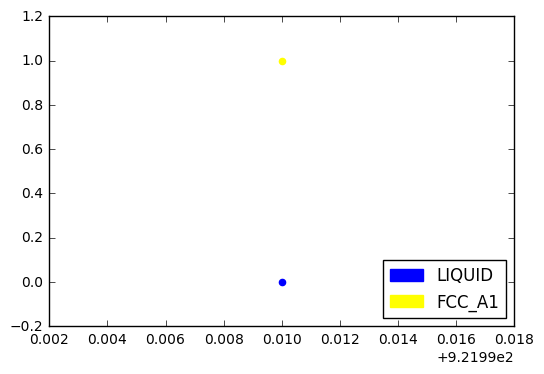

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import equilibrium, calculate
from pycalphad import Database, Model
import pycalphad.variables as v
import numpy as np
from pycalphad.plot.utils import phase_legend

db = Database('alfe_sei.TDB')
phase_names=sorted(list(db.phases.keys()))

my_phases = ['LIQUID', 'FCC_A1']
phase_handles, phasemap = phase_legend(my_phases)

Tvector=np.arange(900.0,950.0,1.0)

eq = equilibrium(db, ['AL', 'FE', 'VA'], my_phases, {v.X('FE'): 1.5e-3, v.T: 922, v.P: 101325}, verbose=True)

print(eq)

plt.figure()

for name in my_phases:
    phase_indices = np.nonzero(eq.Phase.values == name)
    plt.scatter(np.take(eq['T'].values, phase_indices[1]), eq.NP.values[phase_indices], color=phasemap[name])
    plt.gca().legend(phase_handles, my_phases, loc='lower right')

In [ ]:
import numpy as np
from pycalphad.plot.utils import phase_legend
fig = plt.figure()
phase_handles, phasemap = phase_legend(['LIQUID', 'FCC_A1'])
for phase, color in phasemap.items():
    res = calculate(db, ['AL', 'FE', 'VA'], phase, T=920, P=101325)
    order = np.argsort(res.X[0,0].sel(component='FE'))
    x = res.X[0,0].sel(component='FE').values[order]
    y = res.GM[0,0].values[order]
    fig.gca().plot(x, y, c=color)
fig.gca().vlines(1.5e-3, -39000, -37000, colors='r', linestyles='dotted')
fig.gca().set_xlim((0, 2e-2))
fig.gca().set_ylim((-39000, -37000))
fig.gca().set_xlabel('X(FE)')
fig.gca().set_ylabel('Molar Gibbs Energy (J/mol-atom)')
fig.gca().set_title('T = 920 K')
fig.gca().legend(phase_handles, ['LIQUID', 'FCC_A1'], loc='lower right')